In [1]:
import numpy as np
import scipy.signal as signal
%matplotlib notebook
import matplotlib.pyplot as plt

In [54]:
R_1 = 20000
R_p = 150 + 50000
C_1 = 4.7e-6
C_2 = 20e-12

<IPython.core.display.Javascript object>


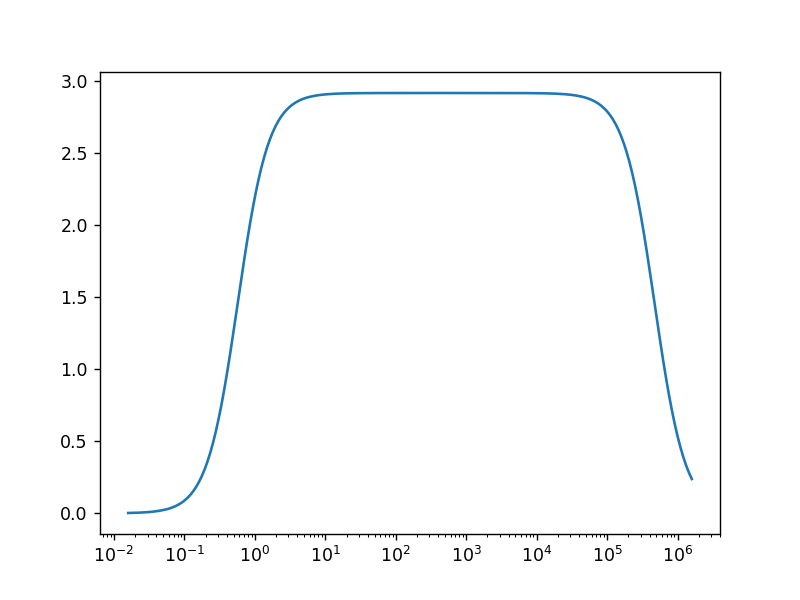

In [58]:
a2 = R_1 * R_p * C_1 * C_2
a1 = R_1 * C_2 + R_p * C_1
a0 = 1

b2 = a2
b1 = a1 + R_1 * C_1
b0 = a0

w, H = signal.freqs ([b2, b1, b0], [a2, a1, a0])
plt.figure()
plt.semilogx (w / (2 * np.pi), 20 * np.log10 (np.abs (H)))
# plt.xlim ((20, 20000))

[9.428199999999998e-08, 0.32970540000000004, 1]
[9.428199999999998e-08, 0.2357054, 1]
[ 1.38519474 -0.06805928 -1.31694962]
[ 1.         -0.06805928 -0.93175488]


<IPython.core.display.Javascript object>


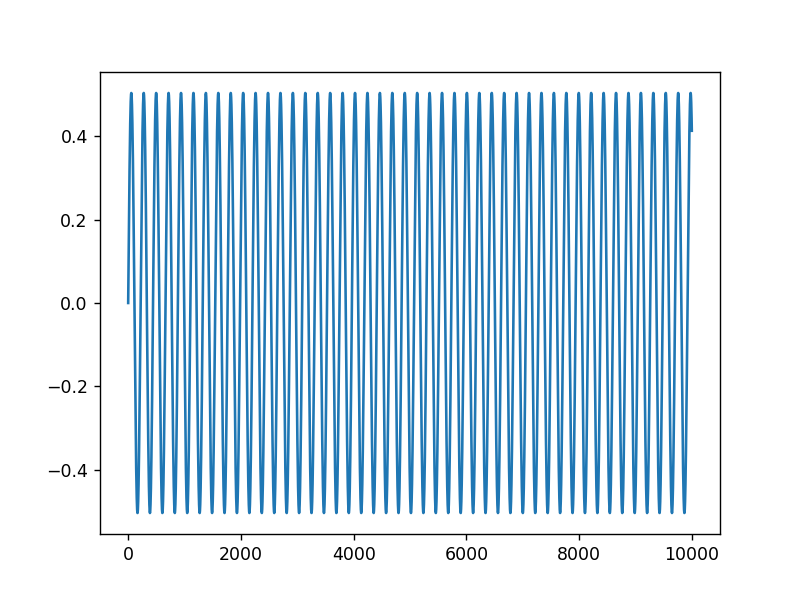

In [68]:
fs = 44100
b_z, a_z = signal.bilinear ([b2, b1, b0], [a2, a1, a0], fs = fs)

print ([b2, b1, b0])
print ([a2, a1, a0])
print (b_z)
print (a_z)

N = 10000
freq = 200
n = np.arange (N)
x = np.sin (2 * np.pi * n * freq / fs) * 1.58 * 0.3185
plt.figure()
plt.plot (x)

In [64]:
def nonlinearity (x):
    y = x / 15.0
    if (y <= -1):
        y = -15
    elif (y >= 1):
        y = 15
    else:
        y = y - y**3/ 3
        y *= 22.5
    return y

<IPython.core.display.Javascript object>


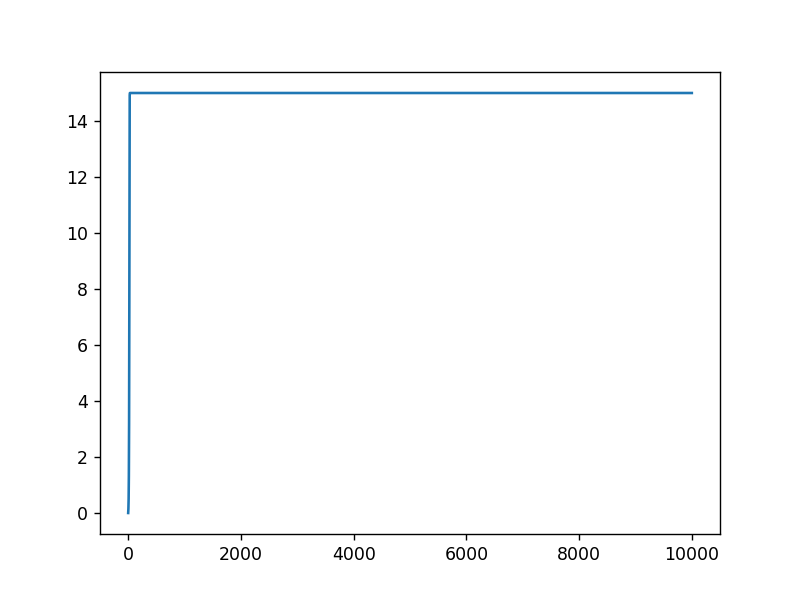

In [69]:
z = [0.0, 0.0, 0.0]
y = np.zeros (N)
for n in range (N):
    y[n] = nonlinearity (z[1] + x[n] * b_z[0])
    
    z[1] = z[2] + x[n] * b_z[1] - y[n] * a_z[1]
    z[2] = x[n] * b_z[2] - y[n] * a_z[2]
    
plt.figure()
plt.plot (y)